In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("Logger active")

In [2]:
from pyvast import VAST

In [10]:
import pyarrow

In [11]:
vast = VAST(binary="vast")

In [12]:
await vast.test_connection()

True

In [13]:
async def query(q):
    stdout, stderr = await vast.export().arrow(q).exec()
    reader = pyarrow.ipc.open_stream(stdout)
    return reader.read_all()

In [14]:
# Select all events of type zeek.conn
data = await query("#type ~ /zeek.conn/")

In [15]:
data.shape

(8505, 22)

In [16]:
data.schema

ts: timestamp[ns]
uid: string
id.orig_h: fixed_size_binary[16]
id.orig_p: fixed_size_binary[3]
id.resp_h: fixed_size_binary[16]
id.resp_p: fixed_size_binary[3]
proto: string
service: string
duration: int64
orig_bytes: uint64
resp_bytes: uint64
conn_state: string
local_orig: bool
local_resp: bool
missed_bytes: uint64
history: string
orig_pkts: uint64
orig_ip_bytes: uint64
resp_pkts: uint64
resp_ip_bytes: uint64
tunnel_parents: list<item: string>
  child 0, item: string
community_id: string

In [17]:
import pandas
df = data.to_pandas()

In [18]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,community_id
0,2009-11-18 08:00:21.486539008,Cz8F3O3rmUNrd0OxS5,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff...,b'D\x00\x11',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff...,b'C\x00\x11',udp,dhcp,1.638200e+08,301.0,...,None,None,0,Dd,1,329,1,328,None,1:aWZfLIquYlCxKGuJ62fQGlgFzAI=
1,2009-11-18 08:08:00.237253888,CeJFOE1CNssyQjfJo1,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff...,b'\x89\x00\x11',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff...,b'\x89\x00\x11',udp,dns,3.780125e+09,350.0,...,None,None,0,D,7,546,0,0,None,1:fLbpXGtS1VgDhqUW+WYaP0v+NuA=
2,2009-11-18 08:08:13.816224000,CJ5Eva2VOSC05Q4yx7,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff...,b'\x89\x00\x11',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff...,b'\x89\x00\x11',udp,dns,3.748647e+09,350.0,...,None,None,0,D,7,546,0,0,None,1:BY/pbReW8Oa+xSY2fNZPZUB1Nnk=
3,2009-11-18 08:07:15.800932864,Cj9SnC3M3m1jTn34S5,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff...,b'\x8a\x00\x11',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff...,b'\x8a\x00\x11',udp,None,4.672538e+10,560.0,...,None,None,0,D,3,644,0,0,None,1:tShwwbRwEMd3S8SvqZxGyvKm+1c=
4,2009-11-18 08:08:13.825211904,C1BPJn1ngD4I5yhIL8,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff...,b'\x8a\x00\x11',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff...,b'\x8a\x00\x11',udp,None,2.248589e+09,348.0,...,None,None,0,D,2,404,0,0,None,1:4iHhzk49NeoFdK6VHSCw4ruRbsw=


In [19]:
df.describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,8.015000e+03,8015.000000,8.015000e+03,8.505000e+03,8505.000000,8.505000e+03,8505.000000,8.505000e+03
mean,2.252200e+10,690.684966,7.096001e+04,1.085233e+03,29.415168,1.910043e+03,73.109347,9.950322e+04
std,7.624190e+11,5123.660370,2.111800e+06,3.424093e+04,1116.924997,4.636414e+04,2399.197504,3.376332e+06
min,1.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,2.891650e+07,35.000000,9.900000e+01,0.000000e+00,1.000000,6.400000e+01,1.000000,8.800000e+01
50%,2.028740e+08,154.000000,2.290000e+02,0.000000e+00,2.000000,2.290000e+02,1.000000,2.550000e+02
75%,2.248884e+09,573.500000,4.560000e+02,0.000000e+00,6.000000,9.590000e+02,5.000000,6.560000e+02
max,6.438000e+13,298738.000000,1.574847e+08,2.493440e+06,100548.000000,4.140066e+06,203934.000000,2.865861e+08


In [20]:
import ipaddress

# Accepts a 128-bit buffer holding an IPv6 address and
# returns an IPv4 or IPv6 address.
def unpack_ip(buffer):
    num = int.from_bytes(buffer, byteorder='big')
    # convert IPv4 mapped addresses back to regular IPv4
    # https://tools.ietf.org/html/rfc4291#section-2.5.5.2
    if (num >> 32) == 65535:
        num = num - (65535 << 32)
    return ipaddress.ip_address(num)

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

INFO:matplotlib.font_manager:generated new fontManager


In [22]:
source = 'id.orig_h'
dest = 'id.resp_h'
edgelist = df.groupby([source, dest]).size().to_frame(name='weight').reset_index()
edgelist[source] = edgelist[source].apply(unpack_ip)
edgelist[dest] = edgelist[dest].apply(unpack_ip)

In [23]:
def draw(edgelist, with_labels=False):
    G = nx.from_pandas_edgelist(edgelist, source=source, target=dest, edge_attr='weight')
    pos = nx.kamada_kawai_layout(G, weight=None)
    edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
    weights = [x / 100 for x in weights]
    nx.draw_networkx_nodes(G, pos=pos)
    nx.draw_networkx_edges(G, pos=pos, edgelist=edges, width=weights)
    if with_labels:
        nx.draw_networkx_labels(G, pos=pos)

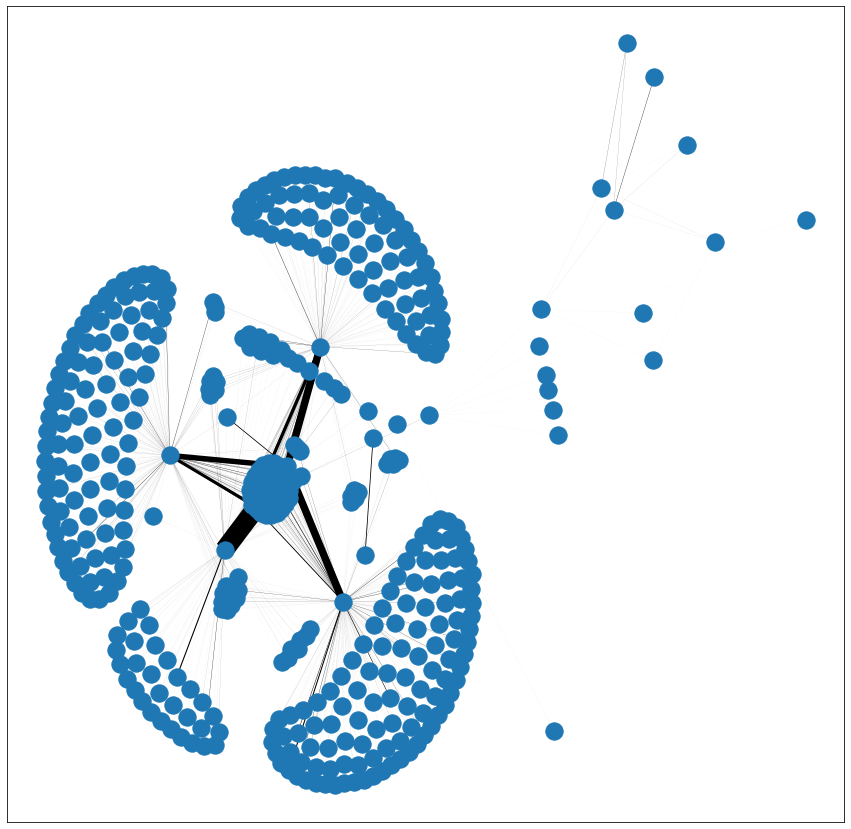

In [24]:
draw(edgelist)

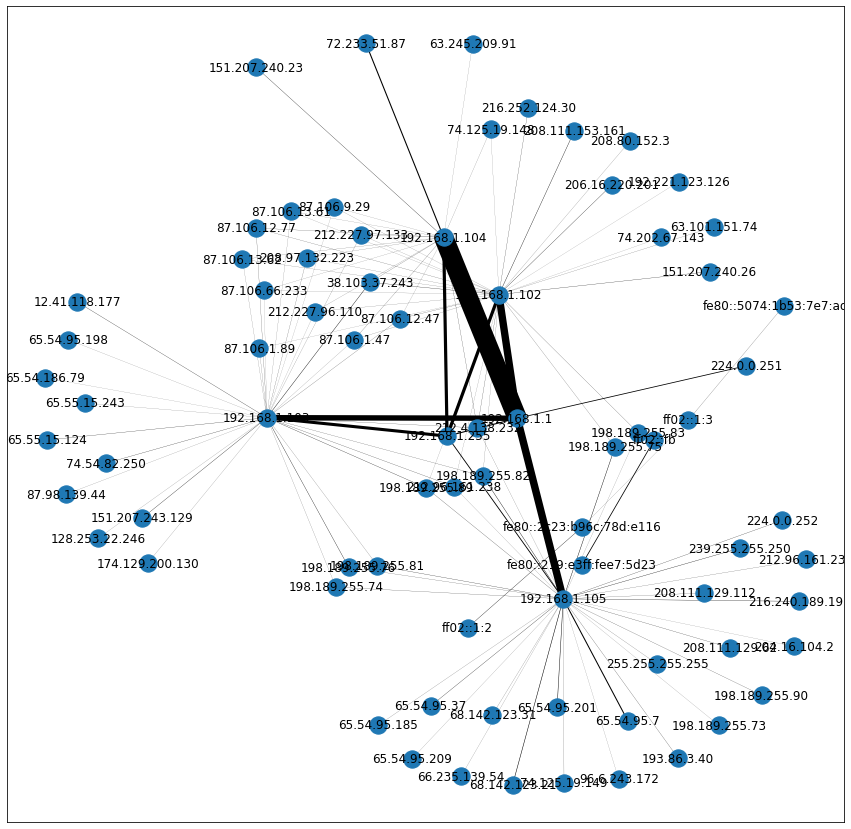

In [25]:
pruned = edgelist[edgelist['weight'] > 8]
draw(pruned, with_labels=True)

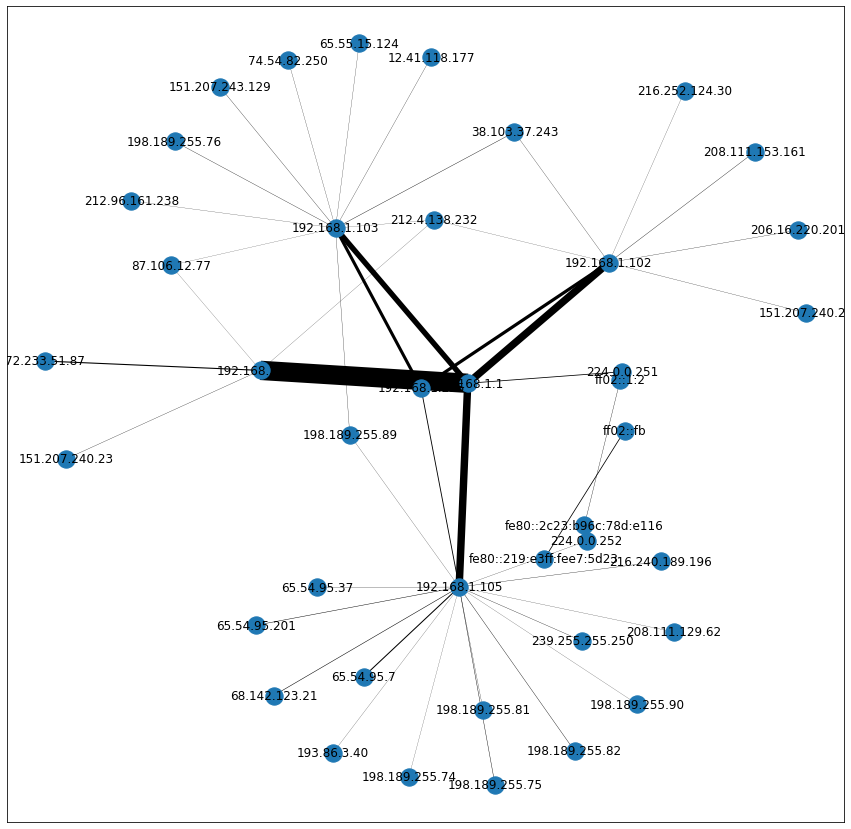

In [26]:
pruned = edgelist[edgelist['weight'] > 16]
draw(pruned, with_labels=True)

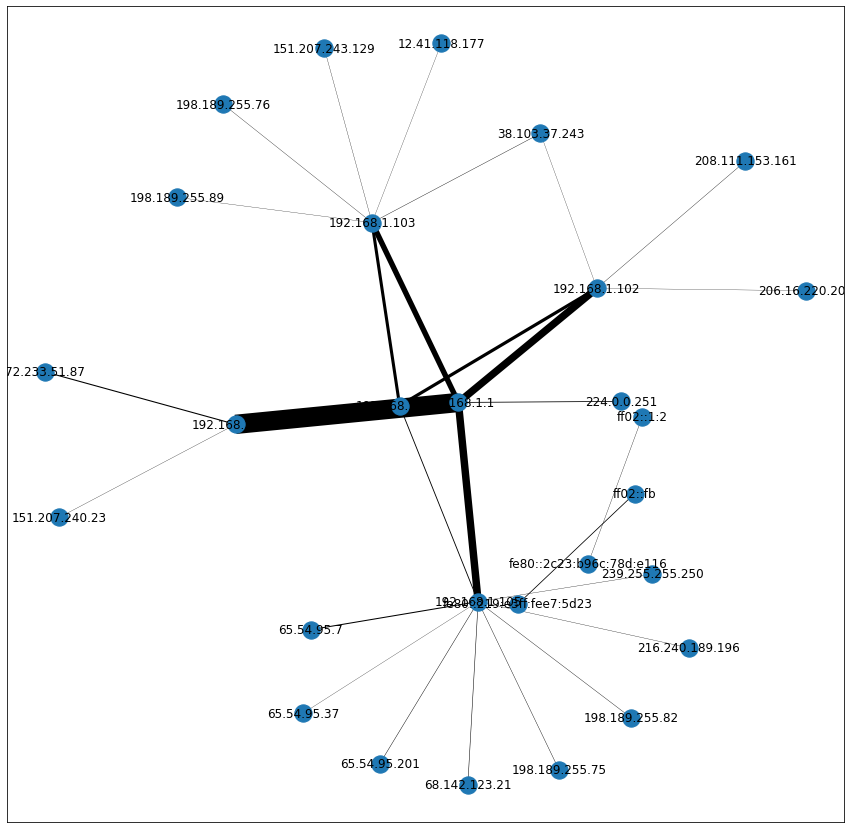

In [27]:
pruned = edgelist[edgelist['weight'] > 24]
draw(pruned, with_labels=True)